(3)=
# Chapter 3: Plotting with Matplotlib

In [1]:
%config InlineBackend.figure_format = 'svg'

Data visualization is an important part of scientific computing both in analyzing your data and in supporting your conclusions. There are a variety of plotting libraries available in Python, but the one that stands out from the rest is matplotlib. Matplotlib is a core SciPy library because it is powerful and can generate nearly any plot a user may need. The main drawback is that it is often verbose. That is to say, anything more complex than a very basic plot may require a few lines of boilerplate code to create. This chapter introduces plotting with matplotlib.

```{index} alias
```

Before the first plot can be created, we must first import matplotlib using the below imports. The first line imports the  `pyplot` module which does much of the basic plotting in matplotlib. While the `plt` alias is not required, it is a common convention in the SciPy community and is highly recommended as it will save you a considerable amount of typing. The second line is not really Python so much as a Jupyter notebook command. It tells Jupyter to display the matplotlib figures directly in the notebook instead of a separate window. This text assumes that you are using inline plotting.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In all the examples below, simply calling a plotting function in a Jupyter notebook will automatically make the plot appear in the Jupyter notebook below the plotting function. However, if you choose to use matplotlib in some other environment, it is often necessary to also execute the following `plt.show()` function to make the plot appear. This can also be done in Jupyter, but it is not shown in the rest of this chapter as Jupyter does not require it.

In [3]:
plt.show()

(3.1)=
## 3.1 Plotting Basics

Before creating our first plot, we need some data to plot, so we will generate data points from orbital radial wave functions. The following equation defines the wave function ($\psi$) for the 3s atomic orbital of hydrogen with respect to atomic radius ($r$) in Bohrs ($a_0$).

$$ \psi_{3s} = \frac{2}{27}\sqrt{3}(2r^{2/9} - 2r + 3)e^{-r/3} $$

We will generate points on this curve using a method called list comprehension covered in section [2.1.2](2.1.2). In the examples below, `r` is the distance from the nucleus and `psi_3s` is the wave function. If you choose to plot something else, just make two lists or tuples of the same length containing the $x$ and $y$ values.

In [4]:
# create Python function for generating 3s radial wave function
import math

def orbital_3S(r):
    wf = (2/27)*math.sqrt(3)*(2*r**2/9 - 2*r + 3)* math.exp(-
         r/3)
    return wf

In [5]:
# generate data to plot
r = [num / 4 for num in range(1, 150, 3)]
psi_3s = [orbital_3S(num) for num in r]

(3.1.1)=
### 3.1.1 First Plot

To visualize the 3s wave functions, we will call the `plot()` function, which is a general-purpose function for plotting. The `r` and `psi_3s` data are fed into it as positional arguments as the $x$ and $y$ variables, respectively. Because of the `%matplotlib inline` command, the output displays directly in the Jupyter notebook

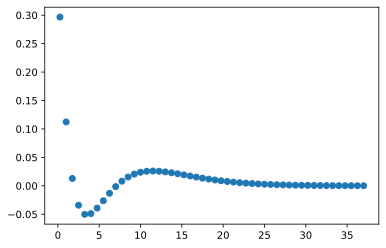

In [6]:
plt.plot(r, psi_3s, 'o')

::::{Tip}
You may have noticed a line of text above the plot that looks something like `[<matplotlib.lines.Line2D at 0x7f83318383a0>]`. If it bothers you, you can suppress it by either ending the line of code with a semicolon (`;`) or adding a line with `plt.show()`.
::::

By default, matplotlib creates a scatter plot using blue as the default color. This can be modified if a blue circles are not to your taste. If the `plot()` function is only provided a single argument, matplotlib assumes the data are the $y$-values and plots them against their indices.

(3.1.2)=
### 3.1.2 Markers and Color

```{index} single: plotting; colors
```
```{index} single: plotting; markers
```

To change the color and markers, you can add a few extra arguments: `marker`, `linestyle`, and `color`. All of these keyword arguments take strings.  The `marker` argument allows the user to choose from a list of markers (Table 1). The `linestyle` argument (Table 2) determines if a line is solid or the type of dashing that occurs, and the `color` argument (Table 3) allows the user to dictate the color of the line/markers. If an empty string is provided to `linestyle` or `marker`, no line or marker, respectively, is included in the plot. See the [matplotlib website](https://matplotlib.org/) for a more complete list of styles.

**Table 1** Common Matplotlib Marker Styles

| Argument | Description |
|:-------: | :--------:  |
| 'o'      |  circle |
| '*'    | star |
| 'p'    | pentagon |
| '^'    | triangle |
| 's'    | square   |


**Table 2** Common Matplotlib Line Styles

| Argument | Description |
|:-------: | :---------: |
|  '-'   | solid |
| '--'   | dashed |
| '-.'   | dash-dot |
| ':'    | dotted |

**Table 3** Common Matplotlib Colors

| Argument | Description |
|:------: | :--------: |
| 'b' | blue |
| 'r' | red  |
| 'k' | black (key) |
| 'g' | green |
| 'm' | magenta |
| 'c' | cyan |
| 'y' | yellow |


There are numerous other arguments that can be placed in the plot command. A few common, useful ones are shown below in Table 4.

**Table 4** A Few Common plot Keyword Arguments

| Argument | Description |
|:------:  | :--------:  |
|`linestyle` or `ls` | line style |
| `marker` | marker style |
|`linewidth` or `lw` | line width |
|`color` or `c` | line color |
|`markeredgecolor` or `mec` | marker edge color |
|`markerfacecolor` or `mfc` | marker color |
|`markersize` or `ms` | marker size |

Now that you have seen the keyword argument approach which allows for the fine tuning of plots, there is also a shortcut useful for basic plots. The plot function can take a third, positional argument which makes plotting a lot quicker. If you place a string with a marker style and/or line style, you can adjust the color and markers without the full keyword arguments. This approach does not allow the user as much control as the keyword arguments, but it is popular because of the brevity.

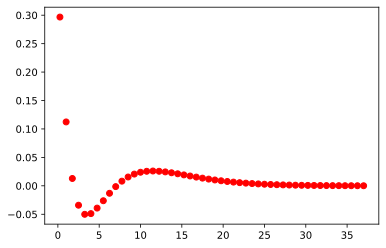

In [7]:
# ro = red circle
plt.plot(r, psi_3s, 'ro')

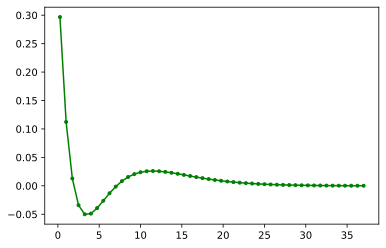

In [8]:
# g.- = green solid line with dots along it
plt.plot(r, psi_3s, 'g.-')

(3.1.3)=
### 3.1.3 Labels

```{index} label plotting axes
```

It is often important to label the axes of your plot. This is accomplished using the `plt.xlabel()` and `plt.ylabel()` functions which are placed on different lines as the `plt.plot()` function. Both functions take strings.

Text(0, 0.5, 'Y Values')

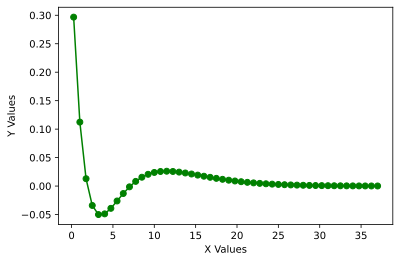

In [9]:
plt.plot(r, psi_3s, 'go-')
plt.xlabel('X Values')
plt.ylabel('Y Values')

```{index} title on plot
```

In the event you want a title at the top of your plots, you can add one using the `plt.title()` argument. To add symbols to the axes, this can be done using Latex commands which are used below, but discussion of Latex is beyond the scope of this chapter.

Text(0, 0.5, 'Wave Function, $\\Psi$')

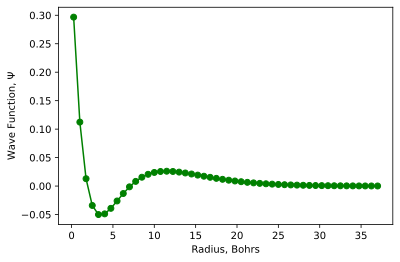

In [10]:
plt.plot(r, psi_3s, 'go-')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wave Function, $\Psi$')

Text(0.5, 1.0, '3S Radial Wave Function')

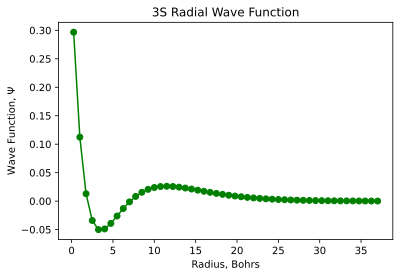

In [11]:
plt.plot(r, psi_3s, 'go-')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wave Function, $\Psi$')
plt.title('3S Radial Wave Function')

(3.1.4)=
### 3.1.4 Figure Size

```{index} single: plotting; figure size
```

If you want to change the size or dimensions of the figure in the Jupyter notebook, this can be accomplished by `plt.figure(figsize(width, height))`. It is important that this function be *above* the the actual plotting function and not below for it to modify the figure.

Text(0.5, 1.0, '3S Radial Wave Function')

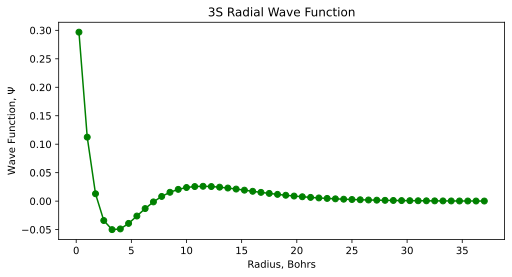

In [12]:
plt.figure(figsize=(8,4))
plt.plot(r, psi_3s, 'go-')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wave Function, $\Psi$')
plt.title('3S Radial Wave Function')

(3.1.5)=
### 3.1.5 Saving Figures

```{index} single: plotting; saving plots
```
```{index} saving plots
```

A majority of matplotlib usage is to generate figures in a Jupyter notebook. However, there are times when it is necessary to save the figures to files for a manuscript, report, or presentation. In these situations, you can save your plot using the `plt.savefig()` function which takes a few arguments. The first and only required argument is the name of the output file as a string. Following this, the user can also choose the resolution in dots per inch using the `dpi` keyword argument. Finally, there are a number of file formats supported by the `plt.savefig()` functions including PNG, TIF, JPG, PDF, SVG, among others. The formats can be selected using the `format` argument which also takes a string, and if no format is explicitly chosen, matplotlib defaults to PNG.

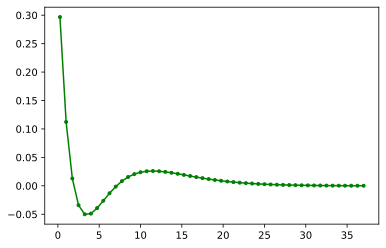

In [13]:
plt.plot(r, psi_3s, 'g.-')
plt.savefig('my_image.png', format='PNG', dpi=600)

```{note}
If you do not see your output image file, be sure that you are looking in the current working directory, which is likely the same folder as your Jupyter notebook. See [section 2.4.1](2.4.1) for using the `os` module to change directories.
```

(3.2)=
## 3.2 Plotting Types

Matplotlib supports a wide variety of plotting types including scatter plots, bar plots, histograms, pie charts, stem plots, and many others. A few of the most common ones are introduced below. For additional plotting types, see the [matplotlib website](https://matplotlib.org/stable/plot_types/index.html).

(3.2.1)=
### 3.2.1 Bar Plots

```{index} single: plotting; bar plot
```

Bar plots, despite looking very different, are quite similar to scatter plots. They both show the same information except that instead of the verticle position of a marker showing the magnitude of a $y$-value, it is represented by the height of a bar. Bar plots are generated using the `plt.bar()` function. Similar to the `plt.plot()` function, the bar plot takes $x$ and $y$ values as positional arguments, and if only one argument is given, the function assumes it is the $y$-variable and plots the values with respect to the index values.

The atomic numbers (`AN`) for the first ten chemical elements are generated below using list comprehension introduced in [section 2.1.2](2.1.2) to be plotted with the molecular weights (`MW`).

In [14]:
AN = [x + 1 for x in range(10)]
MW = [1.01, 4.04, 6.94, 9.01, 10.81, 12.01, 14.01, 16.00, 19.00, 20.18]

Text(0, 0.5, 'Molar Mass, g/mol')

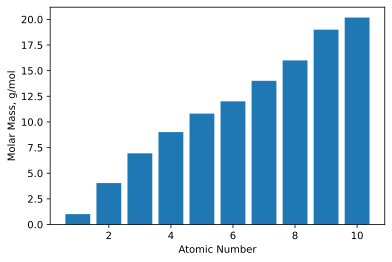

In [15]:
plt.bar(AN, MW)
plt.xlabel('Atomic Number')
plt.ylabel('Molar Mass, g/mol')

The bar plot characteristics can be adjusted like most other types of plots in matplotlib. The main arguments you will probably want to adjust are color and width, but some other arguments are provided in Table 5. The color arguments are consistent with the `plt.plot()` colors from earlier. The error bar arguments can take either a single value to display homogenous error bars on all data points or can take a multi-element object (e.g., a list or tuple) containing the different margins of uncertainty for each data point. 

**Table 5** A Few Common plot Keyword Arguments

| Argument | Description |
|:-------: | :--------:  |
| `width` | bar width |
| `color` | bar color |
| `edgecolor` | bar edge color |
| `xerr` | X error bar |
| `yerr` | Y error bar |
| `capsize` | caps on error bars |


(3.2.2)=
### 3.2.2 Scatter Plots

```{index} single: plotting; scatter plot
```

We have already generated scatter plots using the `plt.plot()` function, but they can also be created using the `plt.scatter()` function. The latter is partially redundant, but unlike `plt.plot()`, `plt.scatter()` allows for different sizes, shapes, and colors of individual markers using the `s=`, `marker=`, and `c=` keyword arguments, respectively. See [section 3.1.2](3.1.2) for a short list of some of the marker shapes and colors available. Links to more complete lists can be found in the [Further Reading](fr03) section.

In the example below, we are loading the famous [wine data set](https://archive.ics.uci.edu/ml/datasets/wine) that describes wine samples through a number of measurements including alcohol content, magnesium levels, color, etc... For convenience, we will load the data set using the scikit-learn library introduced in [section 12.2.2](12.2.2). We then plot it and include a third attribute to the color `c=` argument.

In [16]:
from sklearn.datasets import load_wine
wine = load_wine()
wine = wine.data

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


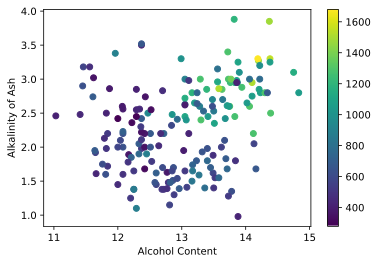

In [17]:
plt.scatter(wine[:,0], wine[:,5], c=wine[:,12])
plt.xlabel('Alcohol Content')
plt.ylabel('Alkalinity of Ash')
plt.colorbar()

In the example above, the alcohol content is represented on the *x*-axis, the alkalinity is represented on the *y*-axis, and the proline content is shown using the color of the markers. The spectrum of colors that represent the values is called the *colormap*, and this can be changed using an optional `cmap=` argument. See the [matplotlib colormap page](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html) for a list of available colormaps. 

```{tip}
In the above example, the lighter colors represent the higher values while the darker colors represent the lower values. If you want to reverse the order of the colors, just place `_r` at the end of the colormap name. For example, `cmap='viridis'` becomes `cmap='viridis_r'`.
```

The `plt.colorbar()` provides a guide as to the meaning of the colors, but it would be nice to also have a text label on the color bar just like the axes. This can be accomplished by assigning the color bar to a varible and then using the `set_label()` attribute to add a label as demonstrated below.

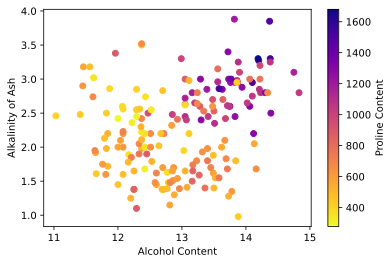

In [18]:
plt.scatter(wine[:,0], wine[:,5], c=wine[:,12], cmap='plasma_r')
plt.xlabel('Alcohol Content')
plt.ylabel('Alkalinity of Ash')

cbar = plt.colorbar()
cbar.set_label('Proline Content')

As an additional example, we can generate a plot of nuclide atomic numbers versus the number of neutrons and color the markers with the log of the half-life, in years, of each nuclide.

In [19]:
import numpy as np
nuc = np.genfromtxt('data/nuclide.csv', delimiter=',', skip_header=1)
nuc

array([[  0.        ,   1.        ,  -4.71070897],
       [  0.        ,   4.        , -29.25458877],
       [  1.        ,   2.        ,   1.09089879],
       ...,
       [117.        , 176.        ,  -9.35267857],
       [117.        , 177.        ,  -8.79123643],
       [118.        , 176.        , -10.73537861]])

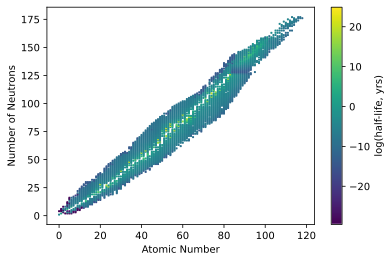

In [20]:
plt.scatter(nuc[:,0], nuc[:,1], s=1, marker='s', c=nuc[:,2], cmap='viridis')
plt.xlabel('Atomic Number')
plt.ylabel('Number of Neutrons')
cbar = plt.colorbar()
cbar.set_label('log(half-life, yrs)')

One of the issues we encounter in the above plot is that the range of half-lives is large with relatively few points in the extreme ends. We can see this in the histogram plot of these log half-life values shown below (see [section 3.2.3](3.2.3)).

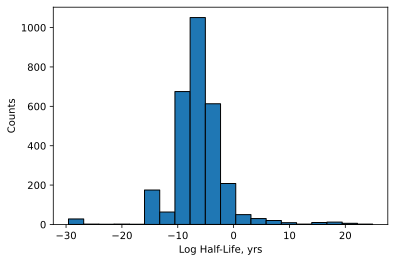

In [21]:
plt.hist(nuc[:,2], bins=20, edgecolor='k')
plt.xlabel('Log Half-Life, yrs')
plt.ylabel('Counts');

In order to prevent the few values at the extremes from effectively washing out the color and making it difficult to see the differences, we can use the `plt.scatter()` arguments `vmax=` and `vmin=` to narrow the colormap range like shown below. By doing this, any values above the `vmax=` value will be a fixed color, and any values below the `vmin=` value with be a fixed color.

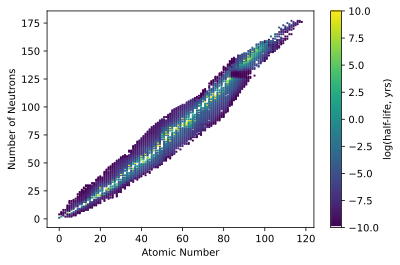

In [22]:
plt.scatter(nuc[:,0], nuc[:,1], s=1, marker='s', c=nuc[:,2], 
            cmap='viridis', vmax=10, vmin=-10)
plt.xlabel('Atomic Number')
plt.ylabel('Number of Neutrons')
cbar = plt.colorbar()
cbar.set_label('log(half-life, yrs)')

(3.2.3)=
### 3.2.3 Histogram Plots

```{index} single: plotting; histogram
```

Histograms display bars representing the frequency of values in a particular data set. Unlike bar plots, the width of the bars in a histogram plot is meaningful as each bar represents the number of $x$-values that fall within a particular range. A histogram plot can be generated using the `plt.hist()` function which does two things. First, the function takes the data provided and sorts them into equally-spaces groups, called *bins*; and second, it plots the totals in each bin. For example, we have a list, `Cp`, of specific heat capacities for various metals in J/g$\cdot^o$C, and we want to visualize the distribution of the specific heat capacities.

Text(0, 0.5, 'Number of Metals')

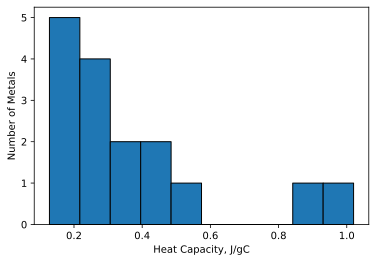

In [23]:
Cp = [0.897, 0.207, 0.231, 0.231, 0.449, 0.385, 0.129, 
      0.412, 0.128, 1.02, 0.140, 0.233, 0.227, 0.523,
      0.134, 0.387]

plt.hist(Cp, bins=10, edgecolor='k')
plt.xlabel('Heat Capacity, J/gC')
plt.ylabel('Number of Metals')

From the plot above, we can see that a large number of heat capacities reside in the area of 0.1-0.5 J/g$\cdot^o$C and none fall in the 0.6-0.8 J/g$\cdot^o$C range. 

The two main arguments for the `plt.hist(data, bins=)` function are `data` and `bins`. The `bins` argument can be either a number of evenly-spaced bins in which the data is sorted, like above, or it can be a list of bin edges like below. The function automatically determines which you are providing based on your input.

Text(0, 0.5, 'Number of Metals')

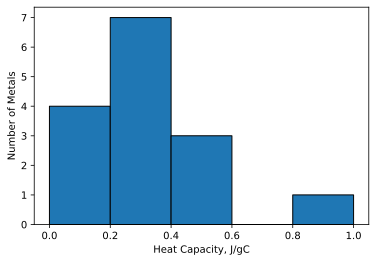

In [24]:
plt.hist(Cp, bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], edgecolor='k')
plt.xlabel('Heat Capacity, J/gC')
plt.ylabel('Number of Metals')

Providing the histogram function bin edges offers far more control to the user, but writing out a list can be tedious. As an alternative, the histogram function also accepts bin edges as `range()` objects. Unfortunately, Python's built-in `range()` function only generates values with integer steps. As an alternative, you can use list comprehension from chapter 2 or use NumPy's `np.arange()` function from [section 4.1.3](4.1.3) which does allow non-integer step sizes.

(3.2.4)=
### 3.2.4 Other Plotting Types

```{index} single: plotting; stem plot
```

There are a variety of other two dimensional plotting types available in the matplotlib library including stem, step, pie, polar, box plots, and contour plots. Below is a table of a few worth knowing about along with the code that created them. See the matplotlib website for further details. Many Python library websites, including matplotlib’s, contain a gallery page which showcases examples of what can be done with that library. It is recommended to brows these pages when learning a new library.

Text(0.5, 1.0, 'Sine Wave')

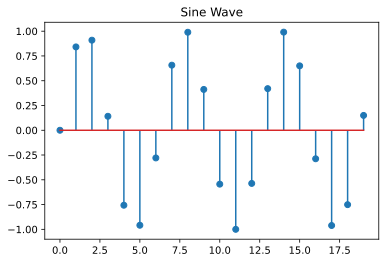

In [25]:
x = range(20)
y = [math.sin(num) for num in x]
plt.stem(x, y)
plt.title('Sine Wave')

```{index} single: plotting; step plot
```

Text(0, 0.5, 'Average Atomic Mass')

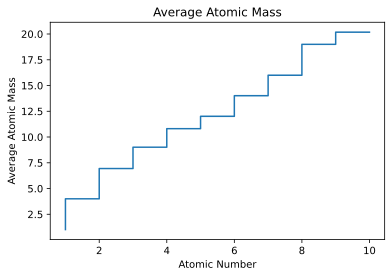

In [26]:
AN = range(1, 11)
mass_avg = [1.01, 4.00, 6.94, 9.01,
10.81, 12.01, 14.01, 16.00, 19.00,
20.18]
plt.step(AN, mass_avg)
plt.title('Average Atomic Mass')
plt.xlabel('Atomic Number')
plt.ylabel('Average Atomic Mass')

```{index} single: plotting; pie plot
```

(-1.106591539900507,
 1.1003139472704666,
 -1.1010344767577331,
 1.106634148119129)

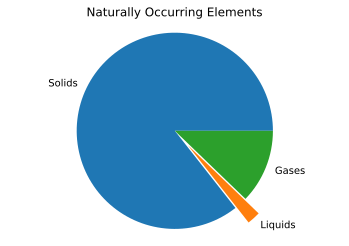

In [27]:
labels = ['Solids', 'Liquids','Gases']
percents = (85.6, 2.2, 12.2)
plt.title('Naturally Occurring Elements')
plt.pie(percents, labels=labels,
explode=(0, 0.2, 0))
plt.axis('equal')

```{index} single: plotting; polar plot
```

Text(0.5, 1.0, '$d_{z^2} \\,$Orbital')

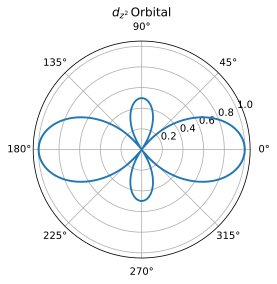

In [28]:
import numpy as np
theta = np.arange(0, 360,0.1)
r = [abs(0.5 * (3 * math.cos(num)**2
-           1)) for num in theta]
plt.polar(theta, r)
plt.title(r'$d_{z^2} \,$' + 'Orbital')

(3.3)=
## 3.3 Overlaying Plots

```{index} single: plotting; overlaying
```

It is often necessary to plot more than one set of data on the same axes, and this can be accomplished in two ways with matplotlib. The first is to call the plotting function twice in the same Jupyter code cell. Matplotlib will automatically place both plots in the same figure and scale it appropriately to include all data. Below, data for the wave function for the 3p hydrogen orbital is generated similar to the 3s earlier, so now the wave functions for both the 3s and 3p orbitals can be plotted on the same set of axes.

In [29]:
def orbital_3P(r):
    wf = (math.sqrt(6)*r*(4-(2/3)*r)*math.e**(-r/3))/81
    return wf

In [30]:
r = [num / 4 for num in range(1, 150, 3)]
psi_3p = [orbital_3P(num) for num in r]

Text(0, 0.5, 'Wave Function')

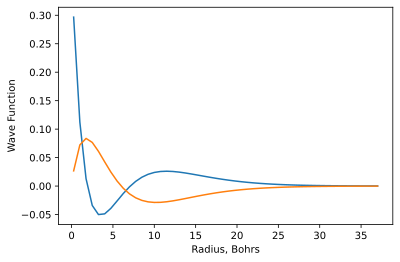

In [31]:
plt.plot(r, psi_3s)
plt.plot(r, psi_3p)
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wave Function')

The second approach is to include both sets of data in the same plotting command as is shown below. Matplotlib will assume that each new non-keyword is a new set of data and that the positional arguments are associated with the most recent data.

Text(0, 0.5, 'Wave Function')

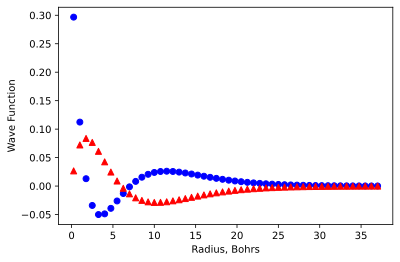

In [32]:
plt.plot(r, psi_3s, 'bo', r, psi_3p,'r^')
plt.xlabel('Radius, Bohrs')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wave Function')

In the second plot above, `r`, `psi_3s`, `'bo'` are the data and style for the first set of data while `r`, `psi_3p`,`'r^'` are the data and plotting style for the second.

```{index} legend
```

One issue that quickly arrises with multifigure plots is identifying which symbols belong to which data. Matplotlib allows the user to add a legend to the plot. The user first needs to provide a label for each data set using the `label=` keyword argument. Finally, calling `plt.legend()` causes the labels to be displayed on the plot. The default is for matplotlib to place the legend where it decides is the optimal location, but this behavior can be overridden by adding a keyword `loc=` argument. A complete list of location arguments are available on the [matplotlib website](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html).

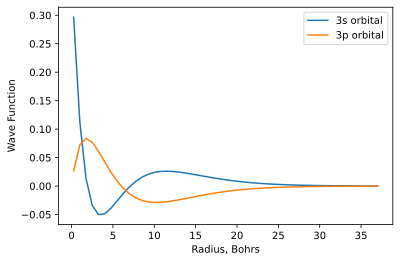

In [33]:
plt.plot(r, psi_3s, label='3s orbital')
plt.plot(r, psi_3p, label='3p orbital')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wave Function')
plt.legend()

(3.4)=
## 3.4 Multifigure Plots

```{index} single: plotting; multifigure
```

To generate multiple, independent plots in the same figure, a few more lines of code are required to describe the dimensions of the figure and which plot goes where. Once you get used to it, it is fairly logical. There are two general methods for generating multifigure plots outlined below. The first is a little quicker, but the second is certainly more powerful and gives the user access to extra features. Whichever method you choose to adopt, just be aware that you will likely see the other method at times as both are common.

(3.4.1)=
### 3.4.1 First Approach

In the first method, we first need to generate the figure using the `plt.figure()` command. For every subplot, we first need to call `plt.subplot(rows, columns, plot_number)`. The first two values are the number of rows and columns in the figure, and the third number is which subplot you are referring to. For example, we will generate a figure with two plots side-by-side. This is a one-by-two figure (i.e., one row and two columns). Therefore, all subplots will be defined using `plt.subplot(1, 2, plot_number)`. The `plot_number` indicates the subplot with the first subplot being 1 and the second subplot being 2. The numbering always runs left-to-right and top-to-bottom.

Text(0.5, 1.0, '3p Orbital')

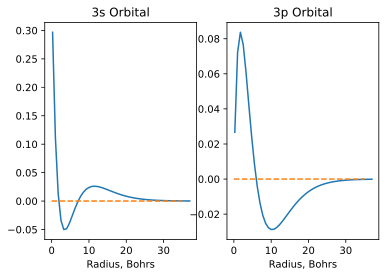

In [34]:
plt.figure()

plt.subplot(1,2,1) # first subplot
plt.plot(r, psi_3s)
plt.hlines(0, 0, 35, linestyle='dashed', color='C1')
plt.xlabel('Radius, Bohrs')
plt.title('3s Orbital')

plt.subplot(1,2,2) # second subplot
plt.plot(r, psi_3p)
plt.hlines(0, 0, 35, linestyle='dashed', color='C1')
plt.xlabel('Radius, Bohrs')
plt.title('3p Orbital')

If you don't like dimensions of your plot, you can still change them using a `figsize=(width, height)` argument in `figure()` function like the following.

Text(0.5, 1.0, '3p Orbital')

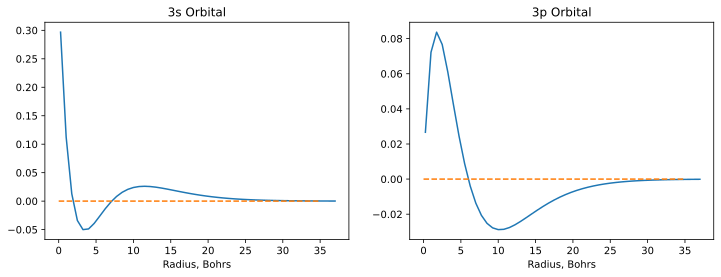

In [35]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1) # first subplot
plt.plot(r, psi_3s)
plt.hlines(0, 0, 35, linestyle='dashed', color='C1')
plt.xlabel('Radius, Bohrs')
plt.title('3s Orbital')

plt.subplot(1,2,2) # second subplot
plt.plot(r, psi_3p)
plt.hlines(0, 0, 35, linestyle='dashed', color='C1')
plt.xlabel('Radius, Bohrs')
plt.title('3p Orbital')

The values in the `plt.subplot()` command may seem redundant. Why are the dimensions for the figure repeatedly defined instead of just once? The answer is that subplots with different dimensions can be created in the same figure (Figure 1). In this example, the top subplot dimension is created as if though it is the first subplot in a 2 $\times$ 1 figure. The bottom two subplot dimensions are created as if they are the third and fourth subplots in a 2 $\times$ 2 figure.

![](img/multifigure.svg)

**Figure 1** Multifigure plots with subplots of different dimensions (right) describe each subplot dimension as if it were part of a plot with equally sized subplots (left).

In the following example, dihedral angle data contained in a hydrogenase enzyme from [*Nat. Chem. Biol.* **2016,** 12, 46-50](https://doi.org/10.1038/nchembio.1976) is important and displayed. The top plot shows the relationship between the psi ($\psi$) and phi ($\phi$) angles while the bottom two plots show the distribution of psi and phi angles using histogram plots.

In [36]:
rama = np.genfromtxt('data/hydrogenase_5a4m_phipsi.csv', delimiter=',', skip_header=1)

psi = rama[:,0]
phi = rama[:,1]

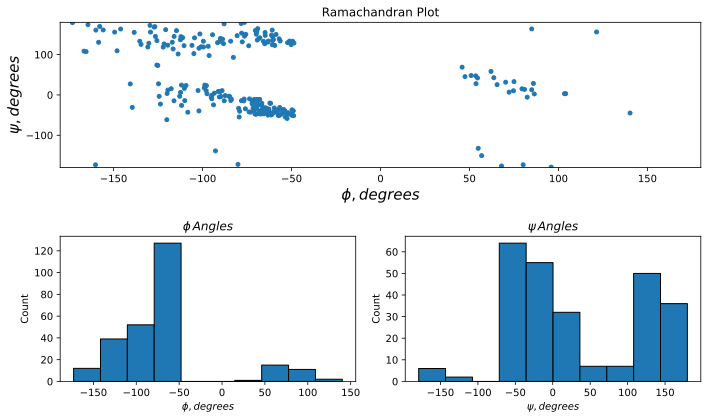

In [37]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(phi, psi, '.', markersize=8)
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.xlabel('$\phi, degrees$', fontsize=15)
plt.ylabel('$\psi, degrees$', fontsize=15)
plt.title('Ramachandran Plot')

plt.subplot(2,2,3)
plt.hist(phi[1:], edgecolor='k')
plt.xlabel('$\phi, degrees$')
plt.ylabel('Count')
plt.title('$\phi \, Angles$')

plt.subplot(2,2,4)
plt.hist(psi[:-1], edgecolor='k')
plt.xlabel('$\psi, degrees$')
plt.ylabel('Count')
plt.title('$\psi \, Angles$')

plt.tight_layout()

```{tip}
There are times when the titles and axis labels for multiple subplots will inadvertantly overlap. If this happens, simply add `plt.tight_layout()` at the very end to fix this.
```

(3.4.2)=
### 3.4.2 Second Approach

The second method is somewhat similar to the first except that it more explicitly creates and linked subplots, called axes. To create a figure with subplots, we first need to generate the overall figure using the `plt.figure()` command again, and we also need to attach it to a variable so that we can explicitly assign axes to it. To create each subplot, use the `add_subplot(rows, columns, plot_number)` command. The arguments in the `add_subplot()` command are the same as `plt.subplot()` in [section 3.4.1](3.4.1). After an axis has been created as part of the figure, call your plotting function preceded by the axis variable name as demonstrated below.

One noticable difference in this method is the functions functions for customizing the function are typically preceeded with `set_` such as `set_title()`, `set_xlim()`, or `set_ylabel()`. 

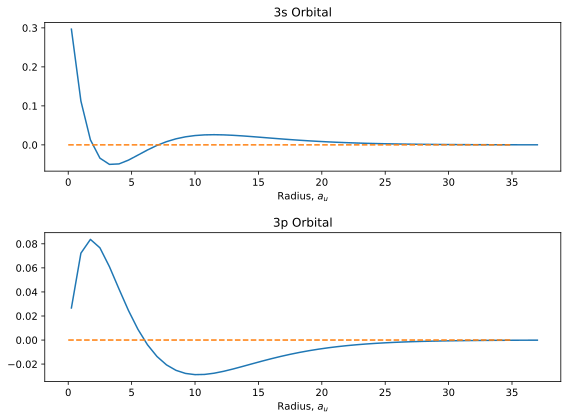

In [38]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(r, psi_3s)
ax1.hlines(0, 0, 35, linestyle='dashed', color='C1')
ax1.set_title('3s Orbital')
ax1.set_xlabel('Radius, $a_u$')


ax2 = fig.add_subplot(2,1,2)
ax2.plot(r, psi_3p)
ax2.hlines(0, 0, 35, linestyle='dashed', color='C1')
ax2.set_title('3p Orbital')
ax2.set_xlabel('Radius, $a_u$')

plt.tight_layout()

(3.5)=
## 3.5 3D Plotting

```{index} single: plotting; 3D
```

To plot in 3D, we will use the approach outlined in [section 3.4.2](3.4.2) with two additions. First, add `from mpl_toolkits.mplot3d import Axes3D ` as shown below. Second, make the plot 3D by adding `projection='3D'` to the `plt.figure()` command. After that, it is analogous to the two dimensional plots above except $x$, $y$, and $z$ data are provided.

In the following example, we will import $xyz$-coordinates for a C$_{60}$ buckyball molecule and plot the carbon atom positions in 3D.

In [39]:
from mpl_toolkits.mplot3d import Axes3D 

In [40]:
C60 = np.genfromtxt('data/C60.csv', delimiter=',', skip_header=1)
x, y, z = C60[:,0], C60[:,1], C60[:,2]

Text(0.5, 0, 'Z axis')

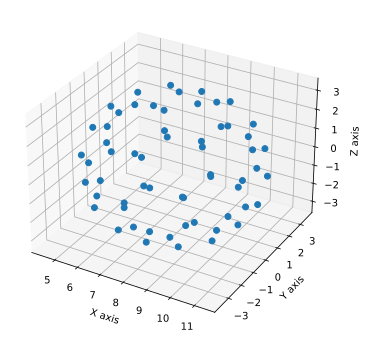

In [41]:
fig = plt.figure(figsize = (10,6))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(x, y, z, 'o')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

(3.6)=
## 3.6 Surface Plots

```{index} single: plotting; surface plot
```

The above 3D plots are simply scatter plots in a three-dimensional space. It is often useful to connect these points to describe surfaces in 3D space which can be used for energy surfaces or atomic orbital shapes among other applications. We again will import `Axes3D` from `mpl_toolkits.mplot3d` as we did in section [3.5](3.5), but we also need to generate a mesh grid to create a surface plot. Mesh grids are simply the $x$ and $y$ axes values extended into a 2D array. A simple example is shown below where the $x$ and $y$ axes are integers from 0 $\rightarrow$ 8. In the left grid, the values represent where each point is with respect to the $x$-axis, and the right grid is likewise where each point is located with respect to the $y$-axis.

![](img/xygrid.svg)

We will use NumPy to generate these grids as NumPy arrays. If you have not yet seen NumPy, you can still follow along in this example without understanding how arrays operate, or you can read chapter 4 and come back to this topic later. For those who are familiar with NumPy, being that the two grids/arrays are of the same dimension, all math is done on a position-by-position basis to generate a third array of the same dimensions as the first two. For example, if we were to take the sum of the squares of the two grids above, we would get the following grid.

$$ z = x^2 + y^2 $$

![](img/zgrid.svg)

Notice that each value on the $z$ grid is the sum of the squared values from the equivalent positions on the $x$ and $y$ grids, so for example, the bottom left value is 64 because it is the sum of 64 and 0.

```{index} meshgrid
```

To generate mesh grids, we will use the `np.meshgrid()` function from NumPy. It requires the input of the desired values from the $x$ and $y$ axes as a list, range object, or NumPy array. The output of the `np.meshgrid()` function is two arrays – the $x$ grid and $y$ grid, respectively. 

In [42]:
import numpy as np

x = np.arange(-10, 10)
y = np.arange(-10, 10)
X, Y = np.meshgrid(x, y)

In [43]:
Z = 1 - X**2 - Y**2

Now to plot the surface. We will use the `plot_surface()` function which requires the `X`, `Y`, and `Z` mesh grids as arguments. As an optional argument, you can designate a color map (`cmap`). Color maps are a series of colors or shades of a color that represents values. The default for matplotlib is `viridis`, but you can change this to anything from a wide selection of color maps provided by matplotlib. For more information on color maps, see the [matplotlib website](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

Text(0.5, 0, 'Z axis')

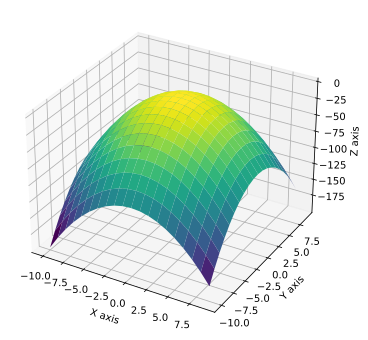

In [44]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

As a more chemical example, we can plot the standing waves for a 2D particle in a box by the following equation where $n_x$ and $n_y$ are the principle quantum numbers along each axis and $L$ is the length of the box.

$$ \psi(x,y) = (2/L)sin(n_x \pi x/L)sin(n_y \pi y/L) $$

We will select $L$ = 1, $n_x$ = 2, and $n_y$ = 1. Again, a meshgrid is generated and a height value is calculated from the $x$ and $y$ values.

In [45]:
L = 1
nx = 2
ny = 1

x = np.linspace(0, L, 20)
y = np.linspace(0, L, 20)
X, Y = np.meshgrid(x,y)

In [46]:
def wave(x, y):
    psi = (2/L) * np.sin(nx*np.pi*X/L) * np.sin(ny*np.pi*Y/L)
    return psi

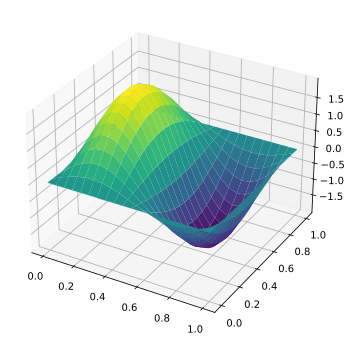

In [47]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, wave(X, Y), cmap='viridis')

You are encouraged to increase the values for $n_x$ and $n_y$ and see how the surface plot changes.

(fr03)=
## Further Reading

The matplotlib website is an excellent place to learn more about plotting in Python. Similar to some other Python library websites, there is a gallery page that showcases many of the capabilities of the matplotlib library. It is often worth browsing to get ideas and a sense of what the library can do. The matplotlib website also provides free cheatsheets summarizing key features and functions.

1. Matplotlib Website. [https://matplotlib.org](https://matplotlib.org/) (free resource)
2. Matplotlib Cheatsheets [https://matplotlib.org/cheatsheets/](https://matplotlib.org/cheatsheets/) (free resouce)
3. Matplotlib Colormap Reference [https://matplotlib.org/stable/gallery/color/colormap_reference.html](https://matplotlib.org/stable/gallery/color/colormap_reference.html) (free resource)
4. Matplotlib Marker Reference [https://matplotlib.org/stable/api/markers_api.html](https://matplotlib.org/stable/api/markers_api.html) (free resource)

## Exercises

Complete the following exercises in a Jupyter notebook using the matplotlib library and be sure to **label axes and include units** when appropriate. Any data file(s) refered to in the problems can be found in the **data** folder in the same directory as this chapter's Jupyter notebook.

1. Visualize the relationship between pressure and volume for 1.00 mol of He(g) at 298 K in an expandable vessel as it increases from 1 L $\rightarrow$ 20 L. R = 0.08206 L·atm/mol·K. This will require you to generate values and perform the calculating using the equation below.

    $$ PV = nRT  $$
    
2. Plot the electronegativity versus atomic number for the first five halogens, and make
the size or color of the markers based on the atomic radii of the element.
You will need to look up the values which should be available in most general chemistry textbooks. If you do not have one available, you can also find these values in the free, open chemistry textbook available on [OpenStax](https://openstax.org/) among other online resources.

3. The following functions are an example of the sandwich theorem which aids in determining limits of function $g(x)$ by knowing its range is between $f(x)$ and $h(x)$ in the relevant domain. Plot all three functions on the same axes to show that f(x) $\leq$ g(x) $\leq$ h(x) for x of -50 $\rightarrow$ 50. Be sure to include a legend.

    $$ f(x) = x^2 \quad g(x) = x^2 sin(x) \quad h(x) = -x^2 $$

4. Plot the concentration of A with respect to time for the following elementary step if $k$
= 0.12 M$^{-1}$s$^{-1}$ using the appropriate integrated rate law. 

    $$ 2 A \rightarrow P $$
    
    ```{index} gas chromatography
    ```

5. Import the **gc_trace.csv** file containing a gas chromatography (GC) trace and plot the intensity (*y*-axis) versus time (*x*-axis) using a line plot. Be sure to label the axes.

6. Import the mass spectra file **ms_bromobenzene.csv** and visualize it using a stem plot where *m/z* is on the *x*-axis and intensity is on the *y*-axis. Hint: the dots on the top of the lines can be removed using `markerfmt=' '` (i.e., feed it a blank space).

7. Earth's atmosphere is composed of 78% N$_2$, 21% O$_2$, and 1% other gases. Represent this data with a pie chart, and make the last 1% slice stick out of the pie like in [section 3.2.4](3.2.4).

8. Create a histogram plot to examine the distribution of values generated below.
        
    ~~~python
    import random
    rdn = [random.random() for value in range(1000)]
    ~~~

9. The $^1$H NMR spectrum of caffeine in CDCl$_3$ is composed of four singlets with the following chemical shifts and relative intensities. Visualize this data using a [stem plot](3.2.4). Hint: the dots on the top of the lines can be removed using `markerfmt=' '` (i.e., feed it a blank space).

    ~~~python
    ppm = [7.52, 4.00, 3.60, 3.44]
    intensity = [1.52, 3.90, 5.74, 5.78]
    ~~~



10. The following table presents the calculated free energies for each step in the binding and splitting of H$_2$(g) by a nickel phosphine catalyst. Visualize the energies over the course of the reaction using a plotting type other than a line or scatter plot. Data from [*Inorg. Chem.* **2016,** 55, 445−460](https://doi.org/10.1021/acs.inorgchem.5b02262).

    | Step  |  Relative Free Energy (kcal/mol) |
    |:-----:|:--------------------------------:|
    |   1   |           0.0                    |
    |   2   |           11.6                   |
    |   3   |           9.8                    |
    |   4   |           13.4                   |
    |   5   |           5.8                    |
    |   6   |           8.3                    |
    |   7   |           2.7                    |

11. Generate two side-by-side plots that show the atomic radii and first ionization energies versus atomic number for the first ten elements on the periodic table. This data should be available on the internet or any general chemistry textbook, including [OpenStax](https://openstax.org/) in the periodic trends chapter. Include titles on both plots along with appropriate axis labels.

12. Generate a standing wave surface plot (similar to the one at the end of [section 3.6](3.6)) using using the following equation and parameters: $L$ = 1, $n_x$ = 2, $n_y$ = 2.

    $$ \Psi(x,y) = (2/L) \, sin(n_x\pi x/L) \, sin(n_y \pi / L) $$
    
13. Load the **amine_bp.csv** file in the data folder which contains the boiling points of primary, secondary, and tertiary amines and the number of carbons in each amine. Plot the boiling point ($x$-axis) versus number of carbons ($y$-axis) for each degree of amine. Your plot should have three distinct trends, one for each degree, represented both in different colors and with different markers. Include a legend on your plot indicating which data points represent which degree of amine.